<center>
    <h1>Prodigy InfoTech Internship</h1>
    <h3>Problem Statement 2 : K-means clustering algorithm to group customers</h3>
</center>

In [86]:
#Importing the Necessary Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [87]:
# Loading the Dataset
df = pd.read_csv('Mall_Customers.csv')

#### Exploratory Data Analysis

In [88]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
df.shape

(200, 5)

In [90]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [92]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Feature Selection

In [93]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
features

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


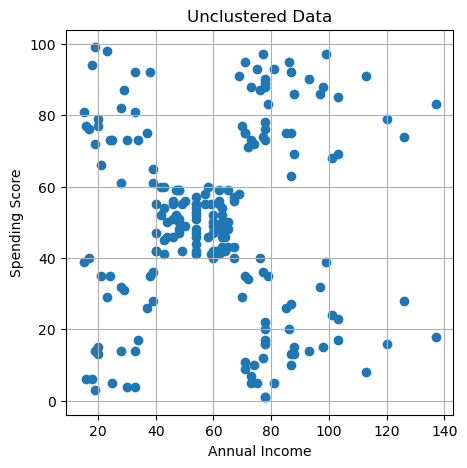

In [94]:
#Visualizing the data 
plt.figure(figsize=(5,5))
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(features.iloc[:,0], features.iloc[:,1])

### Feature Scaling

In [95]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

###  Identifying the value of K 

In [96]:
# Identifying the value of K using the Elbow Method
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, n_init=1)
    km.fit_predict(scaled_features)
    sse.append(km.inertia_)

In [97]:
sse

[399.99999999999994,
 270.6682049684468,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 62.915526703609714,
 44.91118554999014,
 42.8568976648974,
 32.39226763033116,
 31.667793395778343,
 29.489844553315415,
 25.435057126656968,
 22.605955743511473,
 21.87135402710267,
 19.063441705887133]

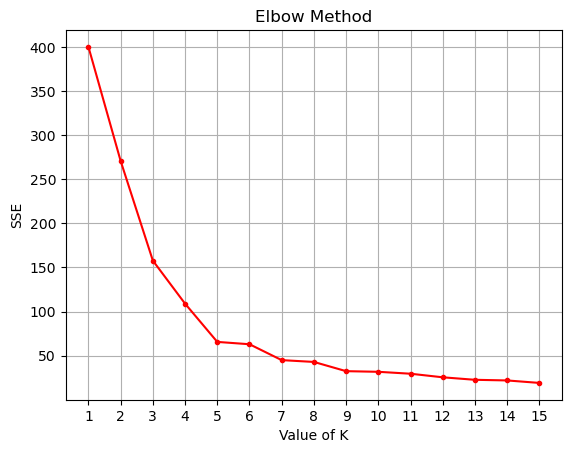

In [98]:
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='.', color='red')

### K Means Clustering Model

In [99]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [100]:
labels = km.labels_
cents = km.cluster_centers_

In [102]:
# Transform centroids back to original scale
cents = scaler.inverse_transform(cents)

### Model Evaluation

In [103]:
score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.5546571631111091


### Visualization of the Cluster 

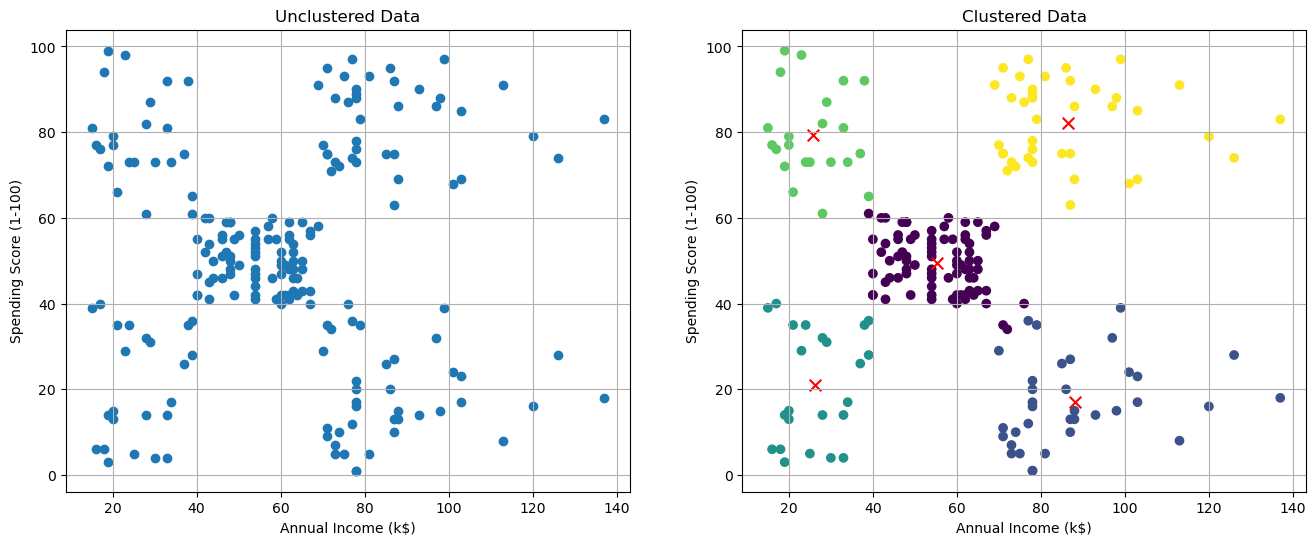

In [104]:
#Plotting the Cluster 
plt.figure(figsize=(16,6))

# Plot the unclustered data
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.scatter(features.iloc[:,0], features.iloc[:,1])

# Plot the clustered data
plt.subplot(1,2,2)
plt.title('Clustered Data')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.scatter(features.iloc[:,0], features.iloc[:,1], c=labels, cmap='viridis')
plt.scatter(cents[:,0], cents[:,1], color='red', s=70, marker='x')

# Show the plot
plt.show()